# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD25"
COLLABORATORS = "Adam Lewiński 407657, Małgorzata Serwańska 405044"

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 1/2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [4]:
# Dane do testów
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["x"])
test_data_1.head()

,x
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [5]:
# Dane do testów
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["x"])
test_data_2.head()

,x
0,False
1,False
2,False
3,False
4,True


### Zadanie 1: Weryfikacja hipotezy o wartości przeciętnej [10 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki t.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk t i t_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku t i t_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: μ = 5`</br>
    `H1: μ ≠ 5`</br>
    `t = -0.0170, t_alpha = 2.1448`</br>
    `|t| < t_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [6]:
def mean_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    t = (np.mean(data.x) - H0) / np.std(data.x, ddof=1) * np.sqrt(len(data.x))
    H = 0

    t_low = -1e10
    t_max = 1e10

    title_str = ""
    title_str_condition = "|t| < t_alpha"
    title_final = f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    if H1 == "two-sided":
        t_alpha = sp.stats.t.ppf(1-alpha/2, len(data.x)-1)
        t_low = min(-t_alpha, t_alpha)
        t_max = max(-t_alpha, t_alpha)
        title_str = f"H1: μ ≠ {H0}"
        if abs(t) >= t_alpha:
            title_str_condition = "|t| >= t_alpha"
            H = 1
    elif H1 == "less":
        t_alpha = sp.stats.t.ppf(alpha, len(data.x)-1)
        t_low = t_alpha
        title_str = f"H1: μ < {H0}"
        title_str_condition = "t > t_alpha"
        if t <= t_alpha:
            title_str_condition = "t <= t_alpha"
            H = 1
    elif H1 == "greater":
        t_alpha = sp.stats.t.ppf(1-alpha, len(data.x)-1)
        t_max = t_alpha
        title_str = f"H1: μ > {H0}"
        title_str_condition = "t < t_alpha"
        if t >= t_alpha:
            title_str_condition = "t >= t_alpha"
            H=1
    else:
        raise ValueError("H1 has wrong value.")

    if H == 1:
        title_final = f"Następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    distribution = "t"
    parameters = [str(len(data.x)-1)]

    title = (f"H0: μ = {H0}\n"
             f"{title_str}\n"
             f"t = {t:.4f}, t_alpha = {t_alpha:.4f}\n"
             f"{title_str_condition}\n"
             f"{title_final}")

    xl_parameters = parameters.copy()
    xl_parameters.insert(0, "0.0001")

    xr_parameters = parameters.copy()
    xr_parameters.insert(0, "0.9999")

    x_l = eval(f"sp.stats.{distribution}.ppf({','.join(xl_parameters)})")
    x_r = eval(f"sp.stats.{distribution}.ppf({','.join(xr_parameters)})")
    x = np.linspace(x_l, x_r, 1000)
    height = np.max(eval(f"sp.stats.{distribution}.pdf(x, {','.join(parameters)})"))
    height += 1/3*height

    x0 = np.linspace(x_l, t_low, 1000)
    x1 = np.linspace(t_max, x_r, 1000)

    plot_parameters = parameters.copy()
    plot_parameters.insert(0, "x")
    y = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x0"
    y0 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x1"
    y1 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    yt0 = [0 for i in range(len(y0))]
    yt1 = [0 for i in range(len(y1))]

    fig, ax = plt.subplots(1, 1, figsize=(10,5), facecolor="white")
    sns.lineplot(x=x, y=y, ax=ax, color="black")
    ax.fill_between(x0, yt0, y0, color="green")
    ax.fill_between(x1, yt1, y1, color="green")
    ax.set_ylim([0,height])
    ax.set_xlim([x_l, x_r])
    ax.set_facecolor("white")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("Probability density")

    vline_parameters = parameters.copy()
    vline_parameters.insert(0, "x")
    ax.vlines(x = t,
          ymin = 0,
          ymax = np.max(1/3*eval(f"sp.stats.{distribution}.pdf({','.join(vline_parameters)})")),
          colors = 'red',
          label = 'vline_multiple - full height')

    return (t, t_alpha, H)

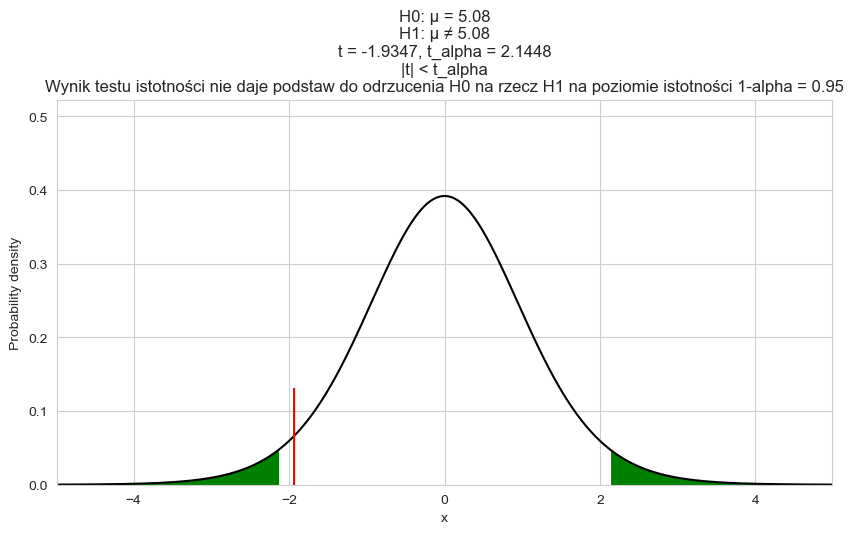

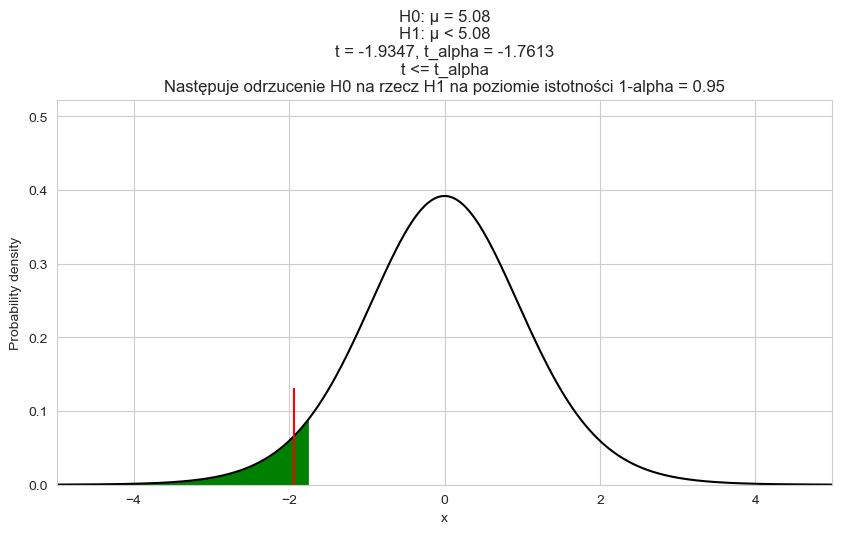

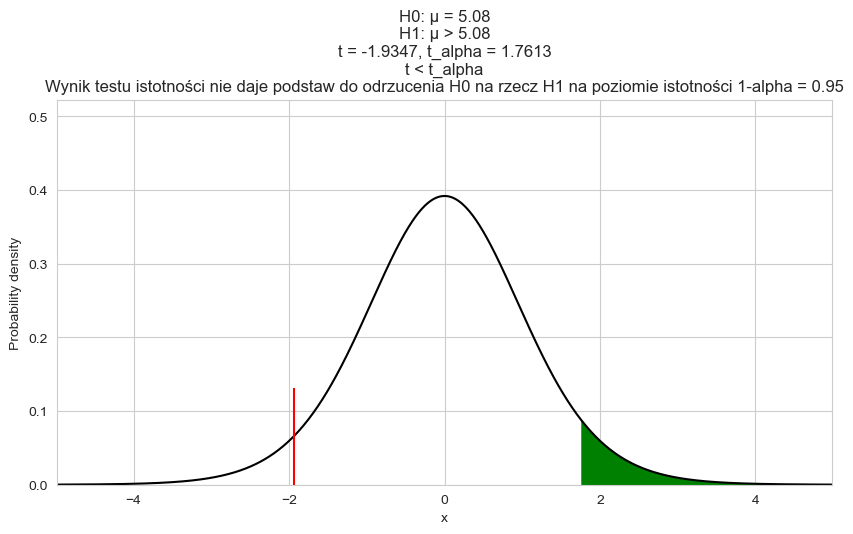

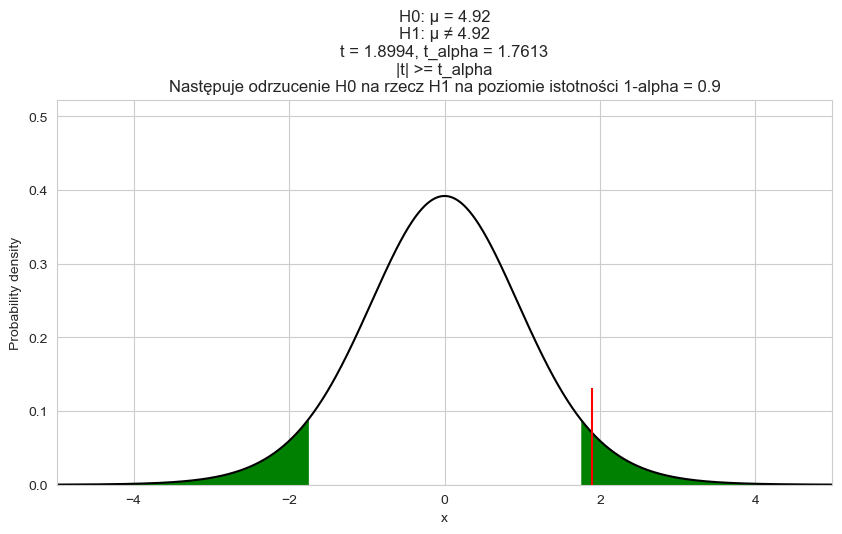

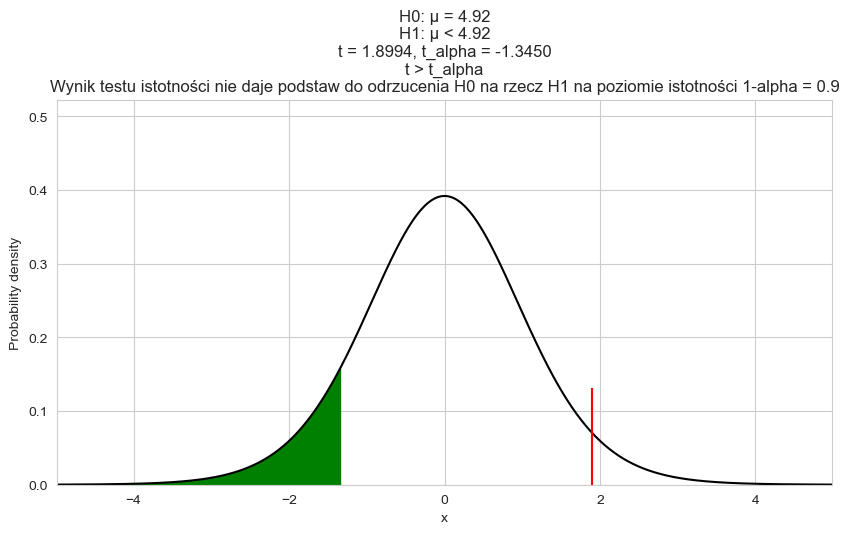

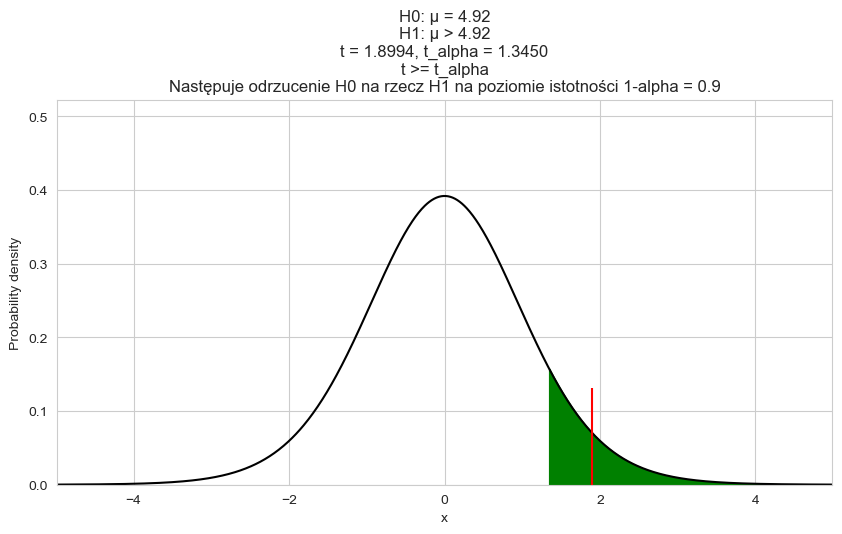

In [7]:
### Komórka testowa

assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)))

assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "two-sided", 0.1), (1.8994107469740968, 1.7613101357748562, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "less", 0.1), (1.8994107469740968, -1.3450303744546486, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "greater", 0.1), (1.8994107469740968, 1.345030374454649, 1)))

### Zadanie 2: Weryfikacja hipotezy o wariancji [10 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki chi2.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk chi2 i chi2_alpha lub chi2, chi2_alpha_1 i chi2_alpha_2 (w zależności od postaci obszaru krytycznego),
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku chi2, chi2_alpha, chi2_alpha_1 i chi2_alpha_2, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: s^2 = 25`</br>
    `H1: s^2 > 25`</br>
    `chi2 = 40.0000, chi2_alpha = 30.1435`</br>
    `chi2 <= chi2_alpha`</br>
    `Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [8]:
def variance_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej.
    H0: float
        Wariancji przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wariancja jest różna od wartości przyjętej w H0,
        - less: wariancja jest mniejsza od wartości przyjętej w H0,
        - greater: wariancja jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    chi2: float
        Wyliczona na podstawie próby losowej wartość statystyki chi2.
    chi2_alpha: float or list
        Wartość statystyki chi2_alpha lub lista z dwoma wartościami chi2_alpha_1 i chi2_alpha_2
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    chi2 = (len(data.x)-1)*np.var(data.x, ddof=1)/H0
    H = 0

    chi2_alpha = 0

    chi2_low = 0
    chi2_max = 1e10

    title_str = ""
    title_str_condition = "chi2_alpha1 < chi2 < chi2_alpha2"
    title_final = f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    if H1 == "two-sided":
        chi2_alpha1 = sp.stats.chi2.ppf(alpha/2, len(data.x)-1)
        chi2_alpha2 = sp.stats.chi2.ppf(1-alpha/2, len(data.x)-1)
        chi2_low = chi2_alpha1
        chi2_max = chi2_alpha2
        title_str = f"H1: s^2 ≠ {H0}"
        if chi2 <= chi2_alpha1 or chi2 >= chi2_alpha2:
            title_str_condition = "chi2 <= chi2_alpha1 or chi2 >= chi2_alpha2"
            H = 1

    elif H1 == "less":
        chi2_alpha = sp.stats.chi2.ppf(alpha, len(data.x)-1)
        chi2_low = chi2_alpha
        title_str = f"H1: s^2 < {H0}"
        title_str_condition = "chi2 > chi2_alpha"
        if chi2 <= chi2_alpha:
            H = 1
            title_str_condition = "chi2 <= chi2_alpha"

    elif H1 == "greater":
        chi2_alpha = sp.stats.chi2.ppf(1-alpha, len(data.x)-1)
        chi2_max = chi2_alpha
        title_str = f"H1: s^2 > {H0}"
        title_str_condition = "chi2 < chi2_alpha"
        if chi2 >= chi2_alpha:
            H=1
            title_str_condition = "chi2 >= chi2_alpha"
    else:
        raise ValueError("H1 has wrong value.")

    if H == 1:
        title_final = f"Następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"


    #PLOTER
    #PARAMETERS
    distribution = "chi2"
    parameters = [str(len(data.x)-1)]

    #CHANGE!
    string = f"chi2_alpha = {chi2_alpha:.4f}"
    chi_out = chi2_alpha

    #CHANGE!
    if H1 == "two-sided":
        string = f"chi2_alpha1 = {chi2_alpha1:.4f}, chi2_alpha2 = {chi2_alpha2:.4f}"
        chi_out = (chi2_alpha1, chi2_alpha2)

    #CHANGE!
    title = (f"H0: s^2 = {H0}\n"
             f"{title_str}\n"
             f"chi2 = {chi2:.4f}, {string}\n"
             f"{title_str_condition}\n"
             f"{title_final}")

    xl_parameters = parameters.copy()
    xl_parameters.insert(0, "0.0001")

    xr_parameters = parameters.copy()
    xr_parameters.insert(0, "0.9999")

    x_l = eval(f"sp.stats.{distribution}.ppf({','.join(xl_parameters)})")
    x_r = eval(f"sp.stats.{distribution}.ppf({','.join(xr_parameters)})")
    x = np.linspace(x_l, x_r, 1000)
    height = np.max(eval(f"sp.stats.{distribution}.pdf(x, {','.join(parameters)})"))
    height += 1/3*height

    # CHANGE!
    x0 = np.linspace(x_l, chi2_low, 1000)
    x1 = np.linspace(chi2_max, x_r, 1000)

    plot_parameters = parameters.copy()
    plot_parameters.insert(0, "x")
    y = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x0"
    y0 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x1"
    y1 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    yt0 = [0 for i in range(len(y0))]
    yt1 = [0 for i in range(len(y1))]

    fig, ax = plt.subplots(1, 1, figsize=(10,5), facecolor="white")
    sns.lineplot(x=x, y=y, ax=ax, color="black")
    ax.fill_between(x0, yt0, y0, color="green")
    ax.fill_between(x1, yt1, y1, color="green")
    ax.set_ylim([0,height])
    ax.set_xlim([x_l, x_r])
    ax.set_facecolor("white")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("Probability density")

    vline_parameters = parameters.copy()
    vline_parameters.insert(0, "x")
    ax.vlines(x = chi2,
          ymin = 0,
          ymax = np.max(1/3*eval(f"sp.stats.{distribution}.pdf({','.join(vline_parameters)})")),
          colors = 'red',
          label = 'vline_multiple - full height')



    return (chi2, chi_out, H)

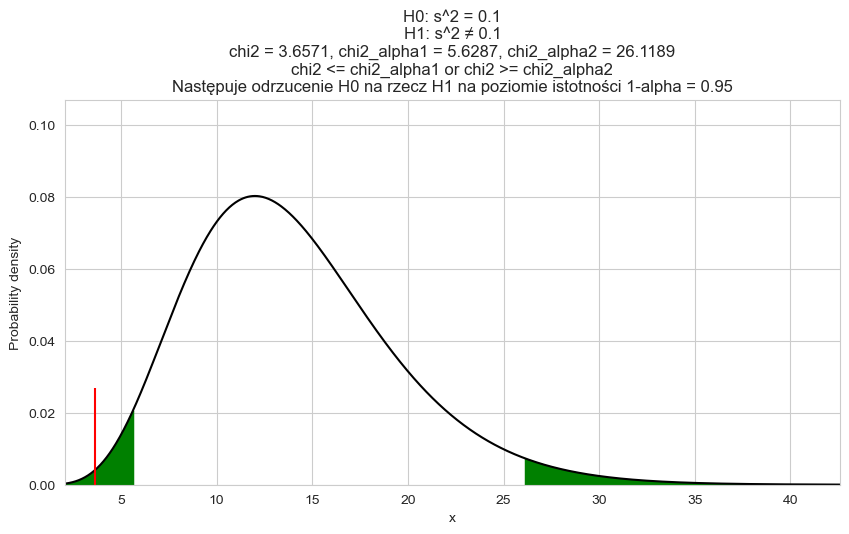

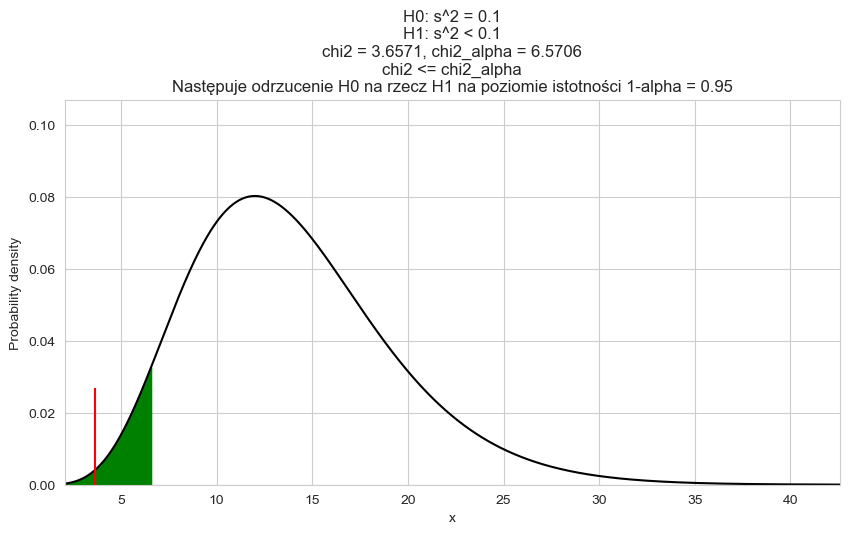

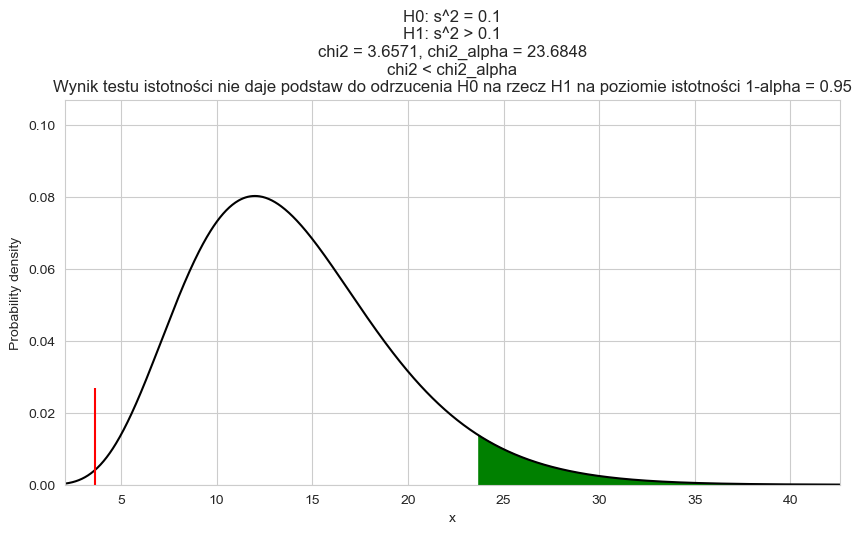

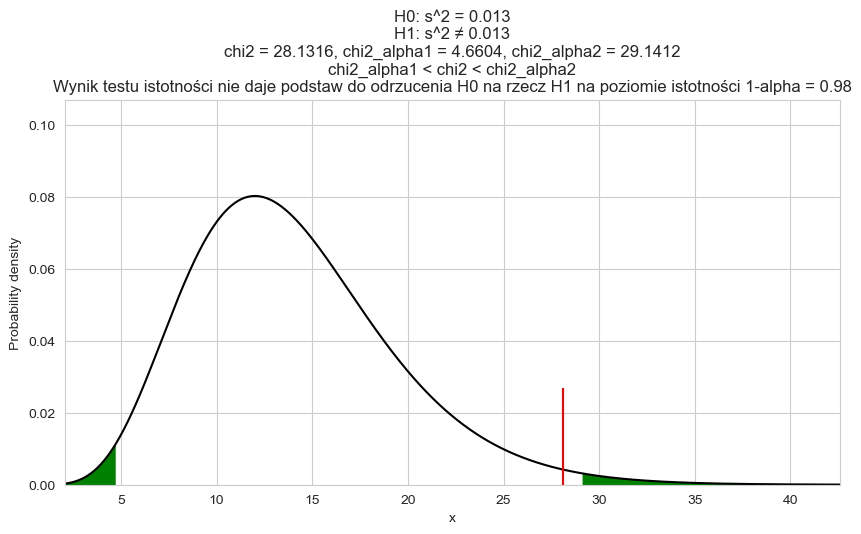

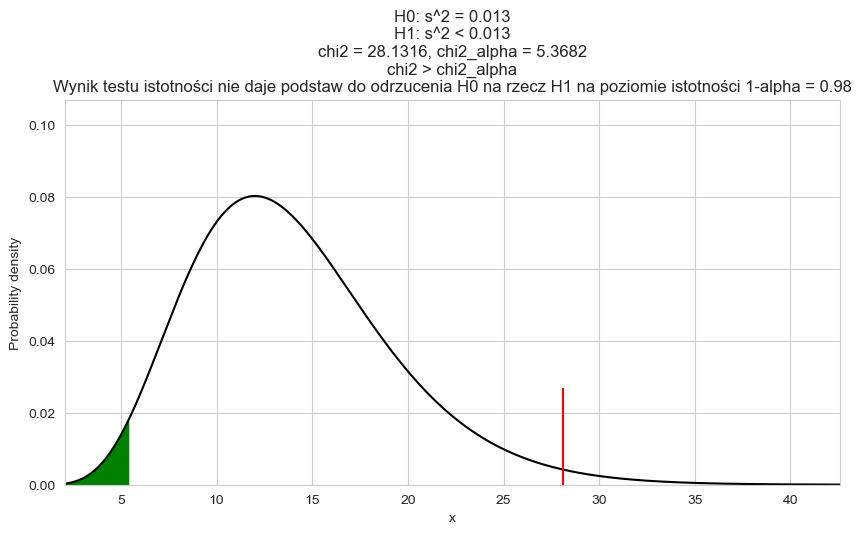

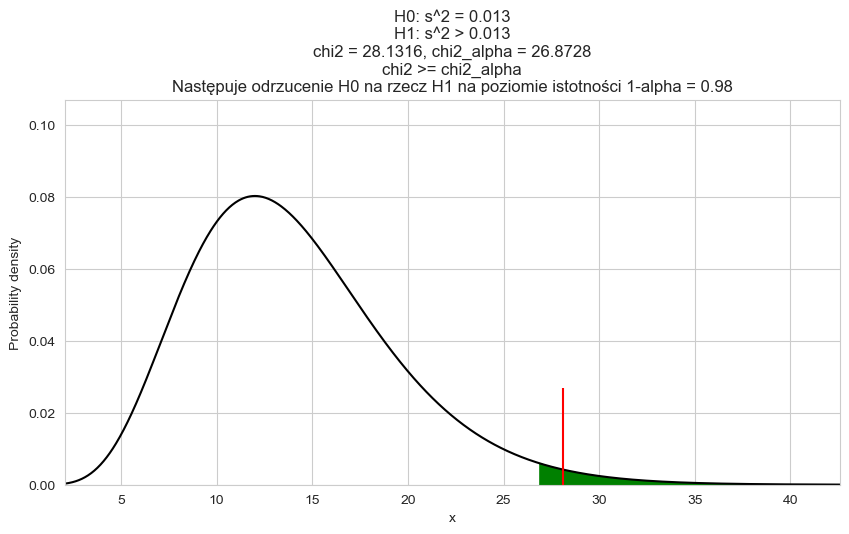

In [9]:
### Komórka testowa

results = variance_NHST(test_data_1, 0.1, "two-sided", 0.05)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (3.657103504858619, 5.628726103039731, 26.11894804503737, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "less", 0.05), (3.657103504858619, 6.570631383789345, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "greater", 0.05), (3.657103504858619, 23.684791304840576, 0)))

results = variance_NHST(test_data_1, 0.013, "two-sided", 0.02)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (28.13156542198938, 4.660425062657768, 29.141237740672796, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "less", 0.02), (28.13156542198938, 5.368197419889671, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "greater", 0.02), (28.13156542198938, 26.872764642314312, 1)))

### Zadanie 3: Weryfikacja hipotezy o wskaźniku struktury (proporcji) [10 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji) i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki u.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk u i u_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku u i u_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: p = 0.3`</br>
    `H1: p > 0.3`</br>
    `u = 1.0494, u_alpha = 1.6449`</br>
    `u < u_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [10]:
def proportion_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "x" wynikami próby losowej (True, False).
    H0: float
        Wartość wskaźnika struktury przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość wskaźnika struktury jest różna od wartości przyjętej w H0,
        - less: wartość wskaźnika struktury jest mniejsza od wartości przyjętej w H0,
        - greater: wartość wskaźnika struktury jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby losowej wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    p = np.sum(data.x)/len(data.x)
    mi = (p-H0) / np.sqrt(H0*(1-H0)/len(data.x))
    H = 0

    mi_low = -1e10
    mi_max = 1e10

    title_str = ""
    title_str_condition = "|u| < u_alpha"
    title_final = f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    if H1 == "two-sided":
        mi_alpha = sp.stats.norm.ppf(1-alpha/2)
        mi_low = min(-mi_alpha, mi_alpha)
        mi_max = max(-mi_alpha, mi_alpha)
        title_str = f"H1: p ≠ {H0}"
        if abs(mi) >= mi_alpha:
            title_str_condition = "|u| >= u_alpha"
            H = 1
    elif H1 == "less":
        mi_alpha = sp.stats.norm.ppf(alpha)
        mi_low = mi_alpha
        title_str = f"H1: μ < {H0}"
        title_str_condition = "u > u_alpha"
        if mi <= mi_alpha:
            title_str_condition = "u <= u_alpha"
            H = 1
    elif H1 == "greater":
        mi_alpha = sp.stats.norm.ppf(1-alpha)
        mi_max = mi_alpha
        title_str = f"H1: μ > {H0}"
        title_str_condition = "u < u_alpha"
        if mi >= mi_alpha:
            title_str_condition = "u >= u_alpha"
            H=1
    else:
        raise ValueError("H1 has wrong value.")

    if H == 1:
        title_final = f"Następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}"

    #PLOTTER
    #PARAMETERS
    distribution = "norm"
    parameters = []

    #CHANGE
    title = (f"H0: p = {H0}\n"
             f"{title_str}\n"
             f"u = {mi:.4f}, u_alpha = {mi_alpha:.4f}\n"
             f"{title_str_condition}\n"
             f"{title_final}")

    xl_parameters = parameters.copy()
    xl_parameters.insert(0, "0.0001")

    xr_parameters = parameters.copy()
    xr_parameters.insert(0, "0.9999")

    x_l = eval(f"sp.stats.{distribution}.ppf({','.join(xl_parameters)})")
    x_r = eval(f"sp.stats.{distribution}.ppf({','.join(xr_parameters)})")
    x = np.linspace(x_l, x_r, 1000)
    height = np.max(eval(f"sp.stats.{distribution}.pdf(x, {','.join(parameters)})"))
    height += 1/3*height

    #CHANGe
    x0 = np.linspace(x_l, mi_low, 1000)
    x1 = np.linspace(mi_max, x_r, 1000)

    plot_parameters = parameters.copy()
    plot_parameters.insert(0, "x")
    y = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x0"
    y0 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    plot_parameters[0] = "x1"
    y1 = eval(f"sp.stats.{distribution}.pdf({','.join(plot_parameters)})")

    yt0 = [0 for i in range(len(y0))]
    yt1 = [0 for i in range(len(y1))]

    fig, ax = plt.subplots(1, 1, figsize=(10,5), facecolor="white")
    sns.lineplot(x=x, y=y, ax=ax, color="black")
    ax.fill_between(x0, yt0, y0, color="green")
    ax.fill_between(x1, yt1, y1, color="green")
    ax.set_ylim([0,height])
    ax.set_xlim([x_l, x_r])
    ax.set_facecolor("white")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("Probability density")

    vline_parameters = parameters.copy()
    vline_parameters.insert(0, "x")

    #CHANGE
    ax.vlines(x = mi,
          ymin = 0,
          ymax = np.max(1/3*eval(f"sp.stats.{distribution}.pdf({','.join(vline_parameters)})")),
          colors = 'red',
          label = 'vline_multiple - full height')

    return (mi, mi_alpha, H)

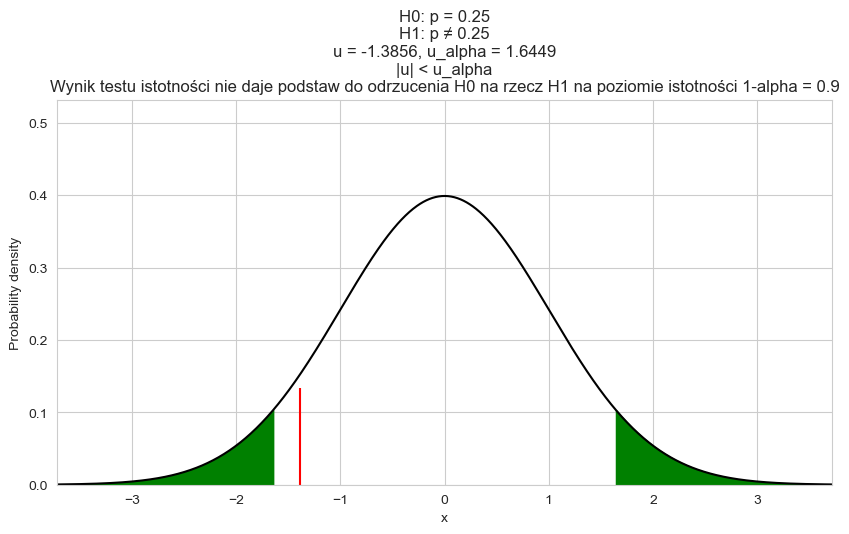

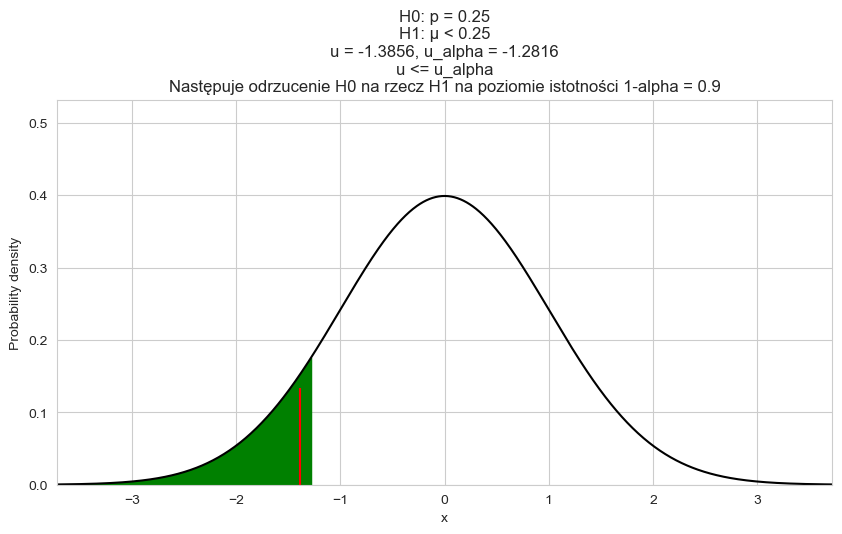

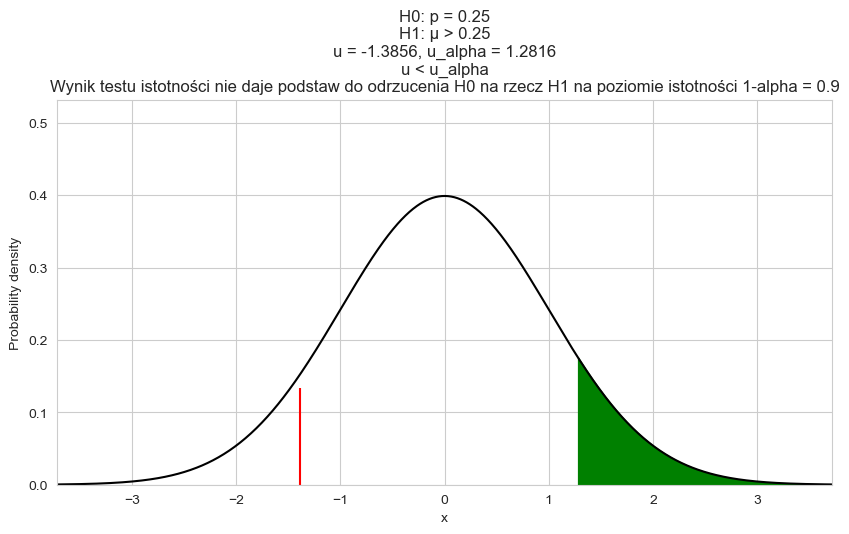

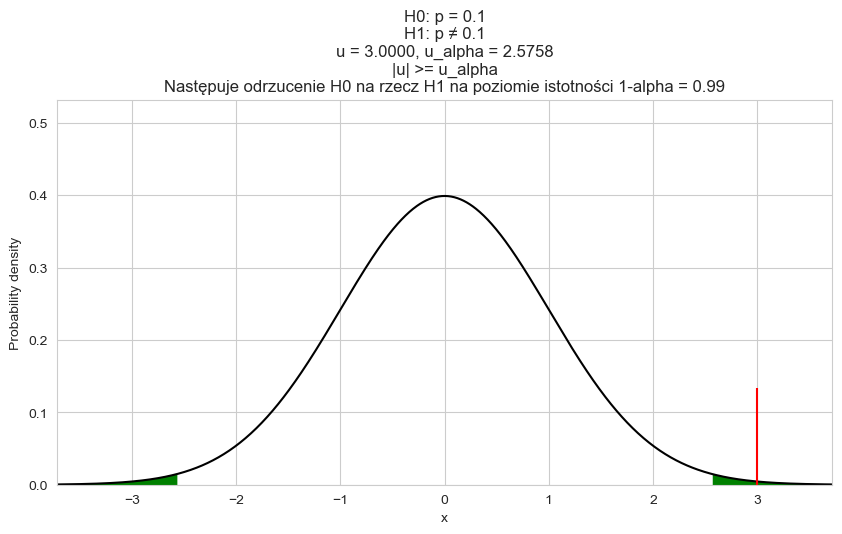

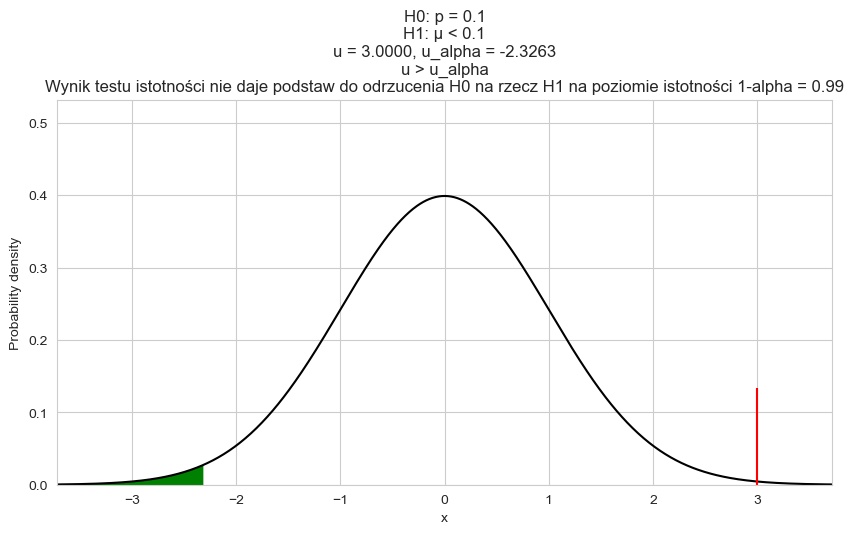

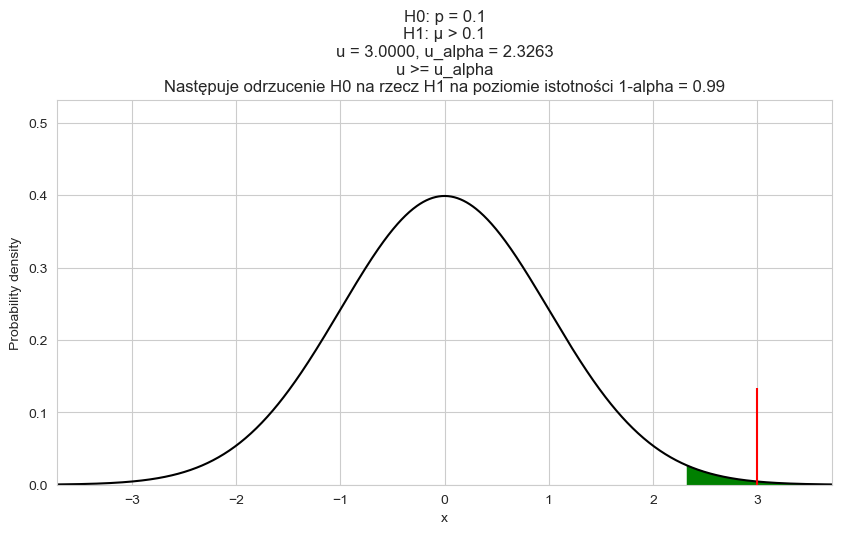

In [11]:
### Komórka testowa
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "two-sided", 0.1), (-1.3856406460551018, 1.6448536269514722, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "less", 0.1), (-1.3856406460551018, -1.2815515655446004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "greater", 0.1), (-1.3856406460551018, 1.2815515655446004, 0)))

assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "two-sided", 0.01), (2.9999999999999996, 2.5758293035489004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "less", 0.01), (2.9999999999999996, -2.3263478740408408, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "greater", 0.01), (2.9999999999999996, 2.3263478740408408, 1)))